In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt


In [2]:

file_path = r'C:\Users\DELL\OneDrive\Documents\XG_viscosity.xlsx'  # Adjust the file path
data = pd.read_excel(file_path)

# data = data[(data[0.005].between(0.05, 50)) & 
#                      (data[0.01].between(0.05, 50)) & 
#                      (data[0.02].between(0.05, 50))]

print("Column names:", data.columns.tolist())

# Extract shear rate and viscosity values, then apply log transformation
shear_rate = (data['Shear Rate'].values)
viscosity = (data[[0.005, 0.01, 0.02]].values)

# Check the transformed values
print("Log-transformed Shear Rate:", shear_rate[:5])  # Display first 5 values
print("Log-transformed Viscosity:", viscosity[:5])    # Display first 5 rows for concentrations


Column names: ['Shear Rate', 0.005, 0.01, 0.02]
Log-transformed Shear Rate: [0.001   0.00126 0.00159 0.002   0.0025 ]
Log-transformed Viscosity: [[ 254. 3690. 8240.]
 [ 277. 3190. 9330.]
 [ 286. 3120. 7810.]
 [ 283. 2640. 6530.]
 [ 269. 2190. 5290.]]


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(shear_rate.reshape(-1, 1), viscosity, test_size=0.2, random_state=42)
X_train1 = np.log(X_train);
X_test1 = np.log(X_test);
y_train1 = np.log(y_train);
y_test1 = np.log(y_test);

In [4]:
# Define the SVR model wrapped in a MultiOutputRegressor
svr_model = MultiOutputRegressor(SVR(kernel='rbf', C=1.0, epsilon=0.1))

# Train the model
svr_model.fit(X_train1, y_train1)


MultiOutputRegressor(estimator=SVR())

In [5]:
# Make predictions
y_pred1 = svr_model.predict(X_test1)

y_pred1 = np.exp(y_pred1)
y_test1 = np.exp(y_test1)
# Calculate metrics for each output
for i in range(viscosity.shape[1]):
    mse = mean_squared_error(y_test1[:, i], y_pred1[:, i])
    mae = mean_absolute_error(y_test1[:, i], y_pred1[:, i])
    r2 = r2_score(y_test1[:, i], y_pred1[:, i])

    
    margin_of_error = 0.10
    within_margin = np.abs((y_test1[:, i] - y_pred1[:, i]) / y_test1[:, i]) <= margin_of_error
    accuracy = np.mean(within_margin) * 100  # Accuracy as a percentage

    print(f"Metrics for Viscosity at {0.5 * (i + 1)}%:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Accuracy (within {margin_of_error * 100}% margin): {accuracy:.2f}%\n")


Metrics for Viscosity at 0.5%:
  Mean Squared Error (MSE): 312.2525
  Mean Absolute Error (MAE): 7.3823
  R² Score: 0.9619
  Accuracy (within 10.0% margin): 61.54%

Metrics for Viscosity at 1.0%:
  Mean Squared Error (MSE): 409089.4168
  Mean Absolute Error (MAE): 213.6673
  R² Score: 0.6229
  Accuracy (within 10.0% margin): 53.85%

Metrics for Viscosity at 1.5%:
  Mean Squared Error (MSE): 1812768.5288
  Mean Absolute Error (MAE): 459.6837
  R² Score: 0.6718
  Accuracy (within 10.0% margin): 38.46%



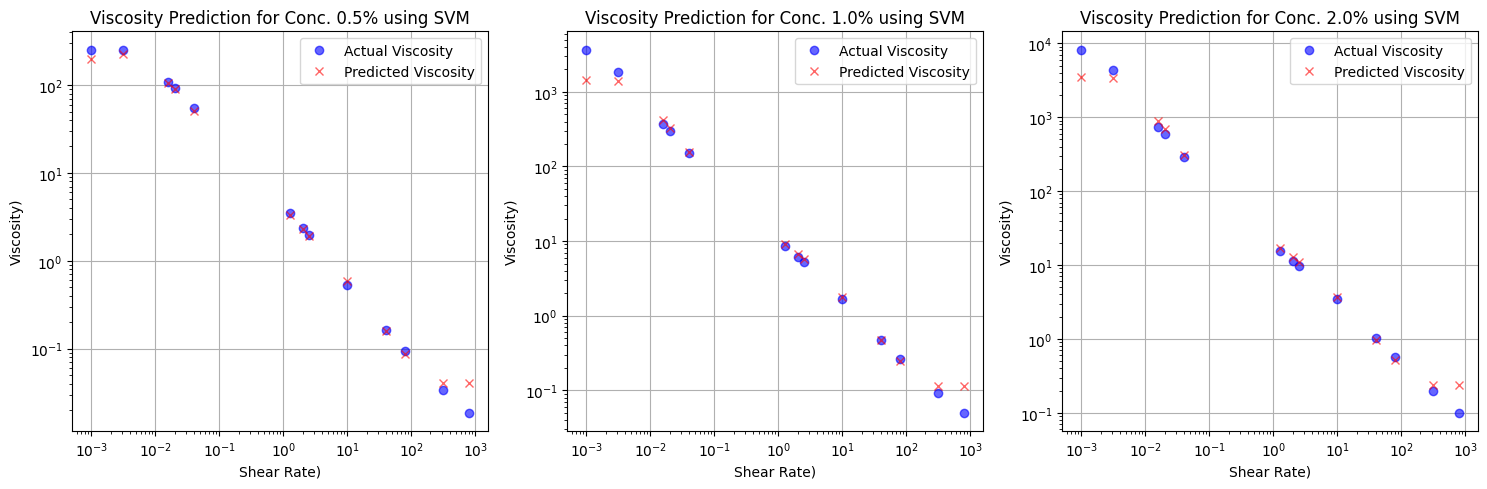

In [6]:
import matplotlib.pyplot as plt

# Define concentrations for labeling purposes
concentrations = [0.005, 0.01, 0.02]

# Plot actual vs. predicted for each concentration
plt.figure(figsize=(15,5))

for i, conc in enumerate(concentrations):
    plt.subplot(1, 3, i+1)
    plt.plot((X_test), y_test1[:, i], 'o', label='Actual Viscosity', color='blue',alpha=0.6)
    plt.plot((X_test), y_pred1[:, i], 'x', label='Predicted Viscosity', color='red',alpha=0.6)
    plt.title(f'Viscosity Prediction for Conc. {conc*100}% using SVM')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Shear Rate)')
    plt.ylabel('Viscosity)')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [7]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.multioutput import MultiOutputRegressor
# import matplotlib.pyplot as plt

# Step 1: Load Your Data
# file_path = r'C:\Users\DELL\OneDrive\Documents\HPAM_viscosity.xlsx'  # Adjust the file path
# data = pd.read_excel(file_path)

# # Extract shear rate and viscosity values using specified keys
# shear_rate = data['Shear Rate'].values
# viscosity = data[[0.005, 0.01, 0.02]].values  # Use the specified keys for viscosity

# Step 2: Split the Data
## X_train, X_test, y_train, y_test = train_test_split(shear_rate.reshape(-1, 1), viscosity, test_size=0.2, random_state=42)

# Step 3: Define and Train the Random Forest Model
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# Train the model
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = rf_model.predict(X_test)

# Calculate metrics for each output
# Define margin of error (e.g., 7%)
margin_of_error = 0.10  # 7%

# Calculate metrics for each output
for i in range(viscosity.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
    r2 = r2_score(y_test[:, i], y_pred[:, i])

    # Calculate accuracy as the percentage of predictions within the margin of error
    within_margin = np.abs((y_test[:, i] - y_pred[:, i]) / y_test[:, i]) <= margin_of_error
    accuracy = np.mean(within_margin) * 100  # Accuracy as a percentage

    print(f"Metrics for Viscosity at {0.5 * (i + 1)}%:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Accuracy (within {margin_of_error * 100}% margin): {accuracy:.2f}%\n")


# Step 5: Visualize Results with log-log scale
x_fit = np.linspace(min(shear_rate), max(shear_rate), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)

plt.figure(figsize=(15, 5))

for i in range(viscosity.shape[1]):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_test, y_test[:, i],color = 'blue', label='Actual Data', alpha=0.6)
    plt.scatter(X_test, y_pred[:, i], color='red', label='Random Forest Prediction', alpha=0.6)
    plt.title(f'Prediction for Viscosity at {0.5 * (i + 1)}% using RF')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Shear Rate')
    plt.ylabel('Viscosity')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Metrics for Viscosity at 0.5%:
  Mean Squared Error (MSE): 100.1943
  Mean Absolute Error (MAE): 5.3058
  R² Score: 0.9878
  Accuracy (within 10.0% margin): 30.77%

Metrics for Viscosity at 1.0%:
  Mean Squared Error (MSE): 39349.0207
  Mean Absolute Error (MAE): 88.2478
  R² Score: 0.9637
  Accuracy (within 10.0% margin): 7.69%

Metrics for Viscosity at 1.5%:
  Mean Squared Error (MSE): 82017.9595
  Mean Absolute Error (MAE): 136.4009
  R² Score: 0.9851
  Accuracy (within 10.0% margin): 15.38%



NameError: name 'model' is not defined

In [ ]:
viscosity_log = (data[[0.005, 0.01, 0.02]].values)  

# Initialize the plot
plt.figure(figsize=(15, 5))

# Train a separate Gradient Boosting model for each concentration level
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjustments to reduce overfitting
for i, concentration in enumerate([0.005, 0.01, 0.02]):
    viscosity = viscosity_log[:, i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        shear_rate.reshape(-1, 1), viscosity, test_size=0.2, random_state=0
    )

    # Initialize and train the Gradient Boosting model with modified parameters
    gb_model = GradientBoostingRegressor(
        n_estimators=1000,        # Increase estimators
        learning_rate=0.01,       # Lower learning rate
        max_depth=3,             # Reduced max depth for simpler trees
        min_samples_leaf=1,      # Minimum samples per leaf to prevent overfitting
        random_state=0
    )
    gb_model.fit(X_train, y_train)

    # Define margin of error (e.g., 10%)
    margin_of_error = 0.10  # 10%

# Make predictions on the test set and x_fit
    y_pred_gb = gb_model.predict(X_test)
    x_fit = np.linspace(min(shear_rate), max(shear_rate), 500).reshape(-1, 1)
    y_fit_gb = gb_model.predict(x_fit)

# Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred_gb)
    mse = mean_squared_error(y_test, y_pred_gb)
    r2 = r2_score(y_test, y_pred_gb)

# Calculate accuracy as the percentage of predictions within the margin of error
    within_margin = np.abs((y_test - y_pred_gb) / y_test) <= margin_of_error
    accuracy = np.mean(within_margin) * 100  # Accuracy as a percentage

# Print metrics
    print(f'Performance for {concentration*100}% Concentration:')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'R-squared (R²): {r2:.4f}')
    print(f'Accuracy (within {margin_of_error * 100}% margin): {accuracy:.2f}%\n')


    # Plot the predictions
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_test, y_test, label='Actual Data', alpha=0.6)
    plt.scatter(X_test, y_pred_gb, label='Predicted Data', color='red', alpha=0.6)
    # plt.plot(x_fit, y_fit_gb, color='blue', label='Gradient Boosting Fit', linewidth=2)
    plt.title(f'Viscosity Prediction for {concentration*100}% Conc. using GB')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Shear Rate')
    plt.ylabel('Viscosity')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Load the data
# file_path = r'C:\Users\DELL\OneDrive\Documents\HPAM_viscosity.xlsx'  # Update with your file path
# data = pd.read_excel(file_path)

# Prepare features and target variables
# Assuming 'Shear Rate' and 'Concentration' are columns in the DataFrame
X = data[['Shear Rate']].values
y = data[[0.005, 0.01, 0.02]].values  # Separate viscosity for each concentration

X = np.log(X)
y = np.log(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and targets
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define the ANN Model
model = Sequential()
model.add(Dense(units=128, input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('tanh'))
model.add(Dropout(0.3))

model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('tanh'))
model.add(Dropout(0.3))

model.add(Dense(units=32))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('tanh'))
model.add(Dropout(0.3))

model.add(Dense(units=3))  # Output layer for 3 viscosities

# Compile the model
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=200,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Define margin of error (e.g., 10%)
margin_of_error = 0.10  # 10%

# Evaluate the model on the test set
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Back-transform the predictions and test values to the original scale
y_test_pred = np.exp(y_test_pred)
y_test = np.exp(y_test)

# Calculate metrics
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate accuracy as the percentage of predictions within the margin of error
within_margin = np.abs((y_test - y_test_pred) / y_test) <= margin_of_error
accuracy = np.mean(within_margin) * 100  # Accuracy as a percentage

# Print metrics
print("Test Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Accuracy (within {margin_of_error * 100}% margin): {accuracy:.2f}%\n")


print("Test Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

# Plot training and validation loss
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Actual vs Predicted for each concentration
plt.figure(figsize=(10, 6))

# Assuming y_test and y_test_pred are the actual and predicted viscosity values (after exponential transformation)
plt.plot(y_test[:, 0], y_test_pred[:, 0], 'bo', label='Shear Rate 0.005')
plt.plot(y_test[:, 1], y_test_pred[:, 1], 'go', label='Shear Rate 0.01')
plt.plot(y_test[:, 2], y_test_pred[:, 2], 'ro', label='Shear Rate 0.02')

# Plotting the ideal prediction line (y=x) for reference
x_vals = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x_vals, x_vals, 'k--', label='Ideal Prediction (y = x)')

plt.title('Actual vs Predicted Viscosity')
plt.xlabel('Actual Viscosity')
plt.ylabel('Predicted Viscosity')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Plot for Shear Rate vs Actual and Predicted Viscosity for Concentration 0.5%
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test[:, 0], c='blue', label='Actual Viscosity (0.5%)', alpha=0.7)
plt.scatter(X_test[:, 0], y_test_pred[:, 0], c='red', label='Predicted Viscosity (0.5%)', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Shear Rate vs Viscosity for Concentration 0.5% using ANN')
plt.xlabel('Shear Rate')
plt.ylabel('Viscosity')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot for Shear Rate vs Actual and Predicted Viscosity for Concentration 1%
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test[:, 1], c='blue', label='Actual Viscosity (1%)', alpha=0.7)
plt.scatter(X_test[:, 0], y_test_pred[:, 1], c='red', label='Predicted Viscosity (1%)', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Shear Rate vs Viscosity for Concentration 1% using ANN')
plt.xlabel('Shear Rate')
plt.ylabel('Viscosity')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot for Shear Rate vs Actual and Predicted Viscosity for Concentration 2%
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test[:, 2], c='blue', label='Actual Viscosity (2%)', alpha=0.7)
plt.scatter(X_test[:, 0], y_test_pred[:, 2], c='red', label='Predicted Viscosity (2%)', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Shear Rate vs Viscosity for Concentration 2% using ANN')
plt.xlabel('Shear Rate')
plt.ylabel('Viscosity')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:


# Load the data
file_path = r'C:\Users\DELL\OneDrive\Documents\XG_viscosity.xlsx'  # Update with your file path
data = pd.read_excel(file_path)

# Check the columns
print(data.columns)

# Prepare features and target variables
X = data[['Shear Rate']].values  # Only using shear rate as feature
y = data[[0.005, 0.01, 0.02]].values  # Separate viscosity for each concentration


# Reshape X for RNN (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))  # Reshaping to 3D array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and targets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(units=64))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=3))  # Output layer for 3 viscosities

# Compile the model
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=80, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_scaled,
                    epochs=200,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the test set
y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)



# Calculate metrics
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
